In [1]:
import excursion.testcases.fast_2D as testcase_2D
import excursion.testcases.fast_1D as testcase_1D
import excursion.testcases.fast_3D as testcase_3D
from excursion import *
from excursion.optimizer.builders import *

In [2]:
device_opt = ['cuda', 'cpu']
dtype = torch.float64
n_initial_points = 3
jump_start_opt = [True, False]
model_type_opt = ['ExactGP', 'GridGP']
model_fit_opt = ['Adam', 'LBFGS']
likelihood_options = [0.0, 0.2]
acq_opt = ['pes', 'mes']

device_str = device_opt[0]
device = torch.device(device_str)
jump_start = jump_start_opt[0]
model_type = model_type_opt[0]
fit_optimizer = model_fit_opt[0]
acq_type = acq_opt[0]

base_model_kwargs = {}
base_model_kwargs['device'] = device
base_model_kwargs['dtype'] = dtype
base_model_kwargs['likelihood_type'] = 'GaussianLikelihood'
base_model_kwargs['epsilon'] = likelihood_options[0]


In [3]:
bounding_box=[[0.0, 1.5]]
ndim = 3
problem_three_details = ExcursionProblem(thresholds=[0.0], bounding_box=bounding_box*ndim, ndim=ndim,
                                         grid_step_size=[30] * ndim, functions=testcase_3D.true_functions)


ndim = 2
problem_two_details = ExcursionProblem(thresholds=[0.0], bounding_box=bounding_box*ndim, ndim=ndim,
                                       grid_step_size=[41]*ndim,
                                       functions=testcase_2D.true_functions)

# ndim = 1
# problem_one_details = ExcursionProblem(thresholds=[0.0], bounding_box=bounding_box, ndim=ndim,
#                                        grid_step_size=[100],
#                                        functions=[testcase_1D.function_1])

problem_one_details = ExcursionProblem(thresholds=[0.7], functions=[testcase_1D.function_1])


if jump_start:
   plus_iterations = 0
else:
    plus_iterations = n_initial_points

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\numpy\lib\index_tricks.py:185: ComplexWarning: Casting complex values to real discards the imaginary part
  nn[k] = (nn[k]*step+start)


C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distribution

tensor([ -254.8684,  -272.9366,  -295.0474,  -323.5477,  -363.7082,  -432.3481,
        -1368.0562,  -340.6582,  -271.9002,  -232.0896,  -199.7376,  -176.5094,
         -157.1036,  -135.6023,  -114.3962,   -95.5627,   -90.9482,   -86.7814,
          -82.9862,   -77.6989,   -74.5625,   -71.6570,   -68.9555,   -66.4366,
          -64.0830,   -61.8800,   -59.8134,   -56.5369,   -54.7703,   -53.1179,
          -51.5747,   -51.3284,   -49.9589,   -47.5647,   -46.4319,   -45.3976,
          -43.4029,   -42.5823,   -41.8545,   -41.2118,   -39.7261,   -39.3109,
          -38.9931,   -38.7740,   -38.6547,   -39.6065,   -39.6919,   -39.8757,
          -39.3150,   -39.7530,   -40.3110,   -40.9935,   -41.8064,   -42.7563,
          -43.8511,   -45.1003,   -46.5154,   -48.1104,   -48.6478,   -50.6093,
          -52.8118,   -56.5810,   -59.5073,   -62.7994,   -66.5667,   -70.9398,
          -76.1080,   -84.3871,   -92.4518,  -103.0918,  -161.7648,  -241.4543,
        -1256.7322,  -340.9708,  -266.30

<Figure size 432x288 with 0 Axes>

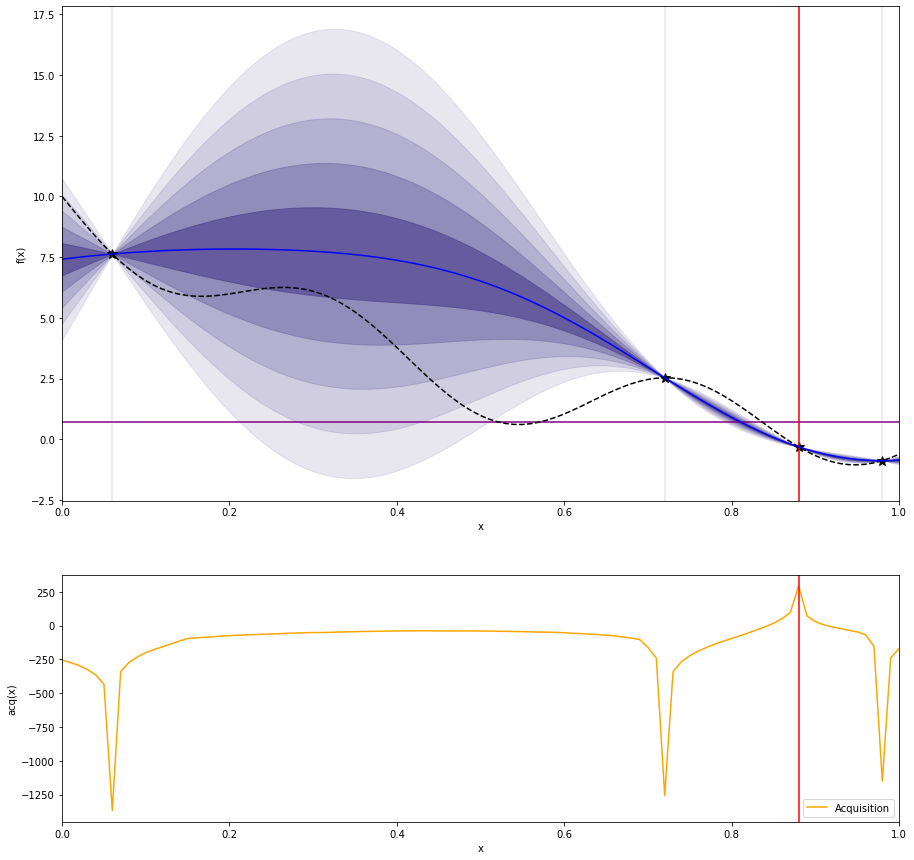

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(


tensor([-1.6835e+02, -1.8589e+02, -2.0736e+02, -2.3501e+02, -2.7397e+02,
        -3.4408e+02, -1.3681e+03, -3.1923e+02, -2.5111e+02, -2.0804e+02,
        -1.8134e+02, -1.5869e+02, -1.4188e+02, -1.2768e+02, -1.1537e+02,
        -1.0338e+02, -9.5136e+01, -8.5349e+01, -7.8610e+01, -7.0772e+01,
        -6.4320e+01, -5.9168e+01, -5.2355e+01, -4.7341e+01, -4.2630e+01,
        -3.8608e+01, -3.3973e+01, -3.0059e+01, -2.6046e+01, -2.2505e+01,
        -1.9141e+01, -1.5859e+01, -1.2431e+01, -1.0992e+01, -9.5537e+00,
        -7.9842e+00, -6.6952e+00, -5.4582e+00, -4.2716e+00, -3.2107e+00,
        -2.0502e+00, -1.0180e+00, -7.2673e-02,  8.5312e-01,  1.6980e+00,
         2.4169e+00,  3.1335e+00,  3.6552e+00,  3.9514e+00,  4.1047e+00,
         4.0171e+00,  3.6471e+00,  2.9504e+00,  1.8802e+00,  3.8821e-01,
        -1.5743e+00, -4.0550e+00, -7.0989e+00, -1.0436e+01, -1.4656e+01,
        -2.4172e+01, -3.4522e+01, -4.7824e+01, -6.4003e+01, -8.2859e+01,
        -1.0473e+02, -1.2494e+02, -1.5128e+02, -1.8

<Figure size 432x288 with 0 Axes>

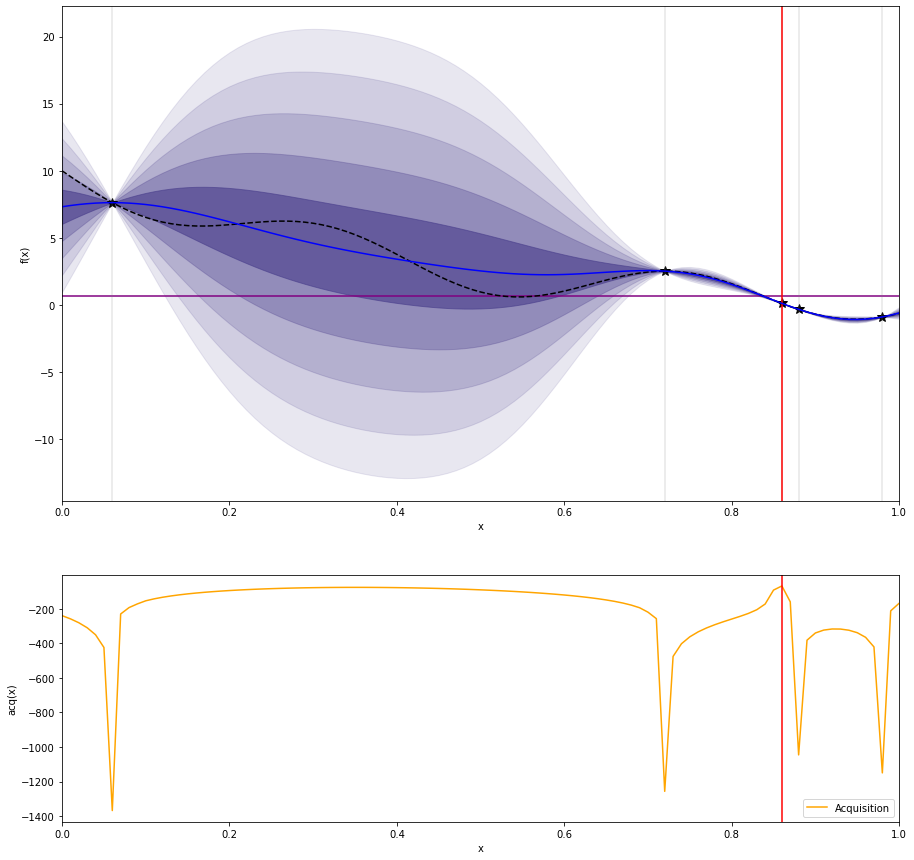

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(


tensor([ -176.8556,  -194.1416,  -215.2403,  -242.3776,  -280.5549,  -349.4169,
        -1368.0562,  -334.6295,  -265.4795,  -226.6459,  -196.5911,  -175.1011,
         -157.4435,  -142.4445,  -129.3949,  -116.3920,  -106.0797,   -95.7787,
          -88.5183,   -80.4453,   -72.6465,   -65.1549,   -57.3816,   -51.0060,
          -46.9691,   -43.1580,   -40.1754,   -36.7416,   -33.5234,   -30.5260,
          -27.7590,   -25.2378,   -23.3622,   -21.3757,   -19.7257,   -18.1644,
          -17.3541,   -16.7835,   -17.3772,   -18.1416,   -20.0781,   -22.7404,
          -27.0919,   -32.6468,   -40.2256,   -51.4456,   -67.2994,  -116.5260,
         -187.3620, -1177.4331,  -193.9659,  -130.6151,   -93.8124,   -77.7365,
          -67.3139,   -63.2901,   -61.3984,   -62.5724,   -66.2876,   -71.2909,
          -78.0100,   -87.2874,   -98.8459,  -115.5056,  -133.4635,  -152.4917,
         -174.1817,  -199.3385,  -229.1492,  -265.9027,  -311.4027,  -387.9483,
        -1256.7322,  -415.4620,  -356.19

<Figure size 432x288 with 0 Axes>

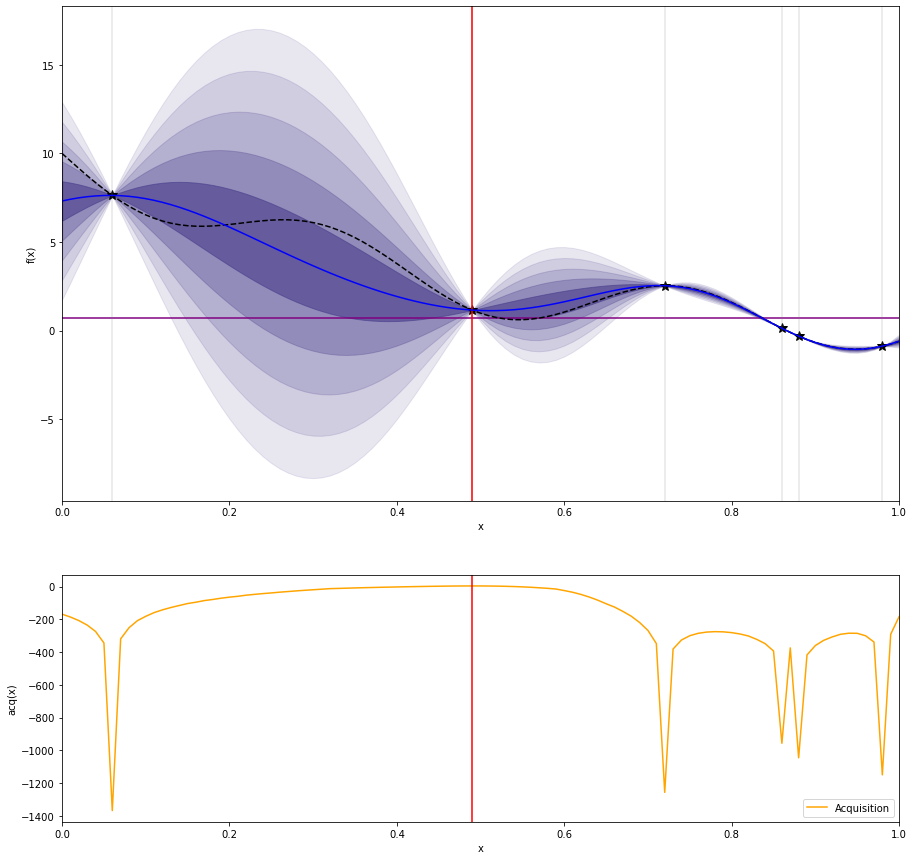

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(


tensor([ -177.8952,  -196.8036,  -219.8284,  -249.2794,  -290.3317,  -359.4763,
        -1368.0562,  -285.1196,  -234.4318,  -205.7911,  -183.8539,  -169.6672,
         -158.7596,  -150.1945,  -143.4177,  -138.0739,  -132.1777,  -129.1339,
         -127.0082,  -125.7225,  -125.2238,  -125.4786,  -126.4701,  -128.1971,
         -130.6733,  -133.9296,  -138.0168,  -143.0112,  -149.0241,  -156.2159,
         -164.8212,  -177.5385,  -190.4146,  -206.5850,  -227.8401,  -258.1876,
         -314.5304, -1319.3756,  -403.2935,  -337.7862,  -300.8848,  -276.3062,
         -259.1794,  -247.6553,  -241.2318,  -240.4193,  -247.0998,  -266.2292,
         -314.2635, -1177.4331,  -216.2926,  -151.1708,  -109.6132,   -84.8606,
          -69.9944,   -60.3400,   -56.0432,   -57.3367,   -61.7418,   -69.3231,
          -78.3617,   -86.5637,  -100.1801,  -112.4160,  -127.0136,  -146.7330,
         -164.6717,  -184.7371,  -210.6950,  -239.1214,  -276.5054,  -340.1057,
        -1256.7322,  -453.4273,  -396.44

<Figure size 432x288 with 0 Axes>

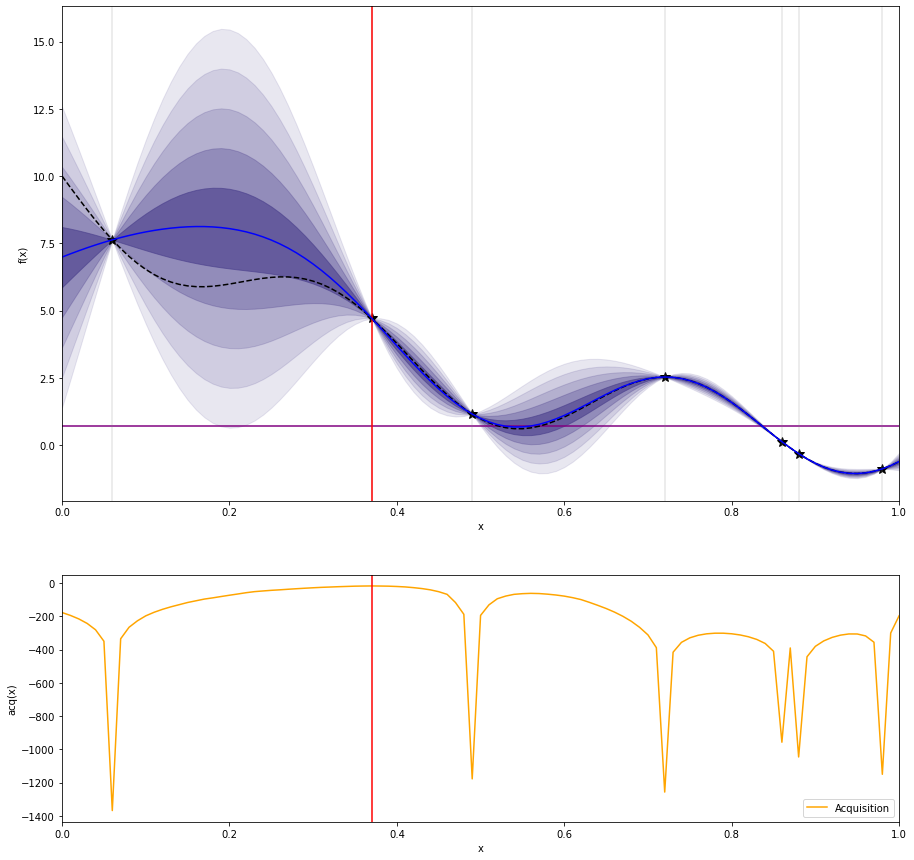

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(


tensor([ -187.5804,  -206.9483,  -230.4302,  -260.3151,  -301.7271,  -370.9902,
        -1368.0562,  -357.5460,  -297.7951,  -261.6052,  -239.5791,  -223.6737,
         -211.7725,  -202.7560,  -195.9645,  -190.9810,  -187.5286,  -185.4183,
         -184.5191,  -184.7407,  -186.0233,  -188.3313,  -191.6493,  -195.9814,
         -201.3506,  -207.8012,  -215.4025,  -224.2557,  -234.5046,  -246.3532,
         -260.0964,  -276.1730,  -295.2684,  -318.5340,  -351.9897,  -393.1818,
         -461.1463, -1319.3756,  -504.1490,  -439.9233,  -409.5663,  -391.7990,
         -381.8400,  -377.9062,  -379.5578,  -387.3708,  -403.2981,  -432.3659,
         -496.1476, -1177.4331,  -458.1703,  -397.3539,  -369.1759,  -361.5154,
         -375.5367,  -425.2679, -1118.1105,  -445.3010,  -386.2352,  -358.7708,
         -345.4213,  -340.2933,  -340.6628,  -345.1289,  -352.9876,  -363.9787,
         -378.1986,  -396.1310,  -418.8330,  -448.4808,  -495.2305,  -565.8806,
        -1256.7322,  -539.1567,  -481.20

<Figure size 432x288 with 0 Axes>

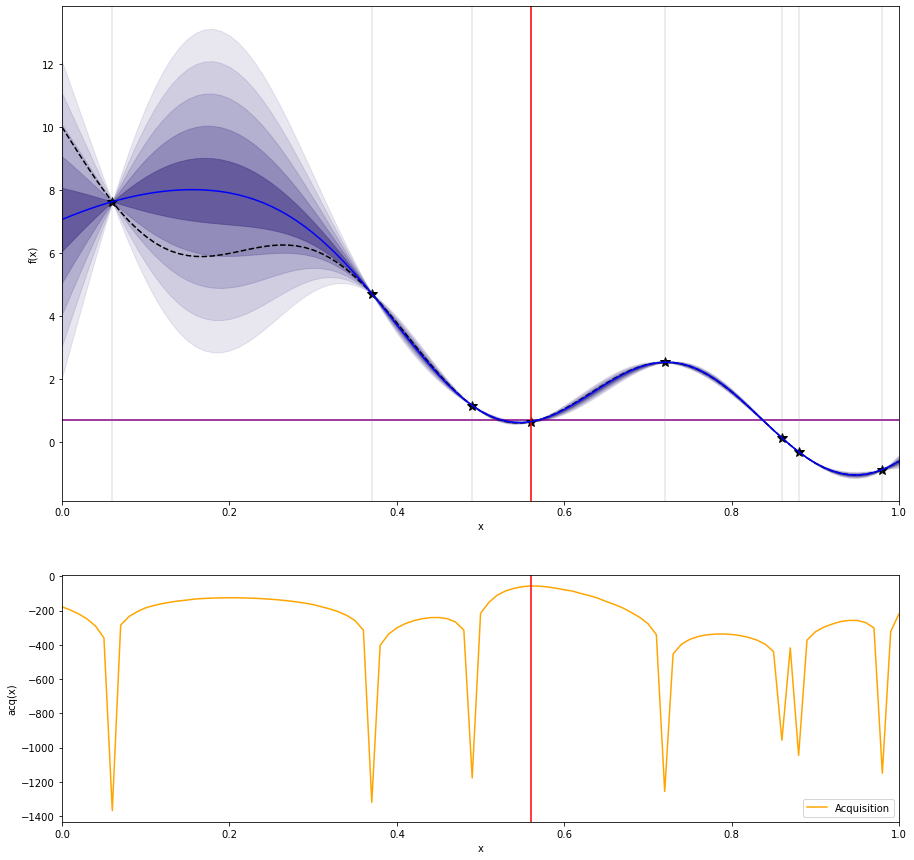

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(


tensor([ -249.9169,  -272.1094,  -298.8319,  -332.5533,  -378.7394,  -454.6565,
        -1368.0562,  -445.8230,  -387.6723,  -358.4682,  -342.1974,  -334.1427,
         -332.5731,  -337.0796,  -348.2313,  -367.9135,  -400.9883,  -463.5986,
        -1342.1918,  -485.0567,  -416.3259,  -378.3074,  -353.7857,  -337.3382,
         -326.5384,  -320.0974,  -317.2684,  -317.6125,  -320.8981,  -327.0631,
         -336.2151,  -348.6722,  -365.0653,  -386.5753,  -415.5303,  -457.2687,
         -528.9380, -1319.3756,  -508.4994,  -446.2561,  -412.7437,  -391.8573,
         -378.7952,  -371.7565,  -370.2853,  -374.9438,  -387.6744,  -413.4989,
         -468.8844, -1177.4331,  -478.3661,  -407.6884,  -373.6639,  -363.0851,
         -377.3989,  -432.1024, -1118.1105,  -407.3461,  -348.1005,  -320.1678,
         -306.0785,  -300.0041,  -299.2933,  -302.6085,  -309.2951,  -319.1299,
         -332.2361,  -349.1170,  -370.8434,  -399.6013,  -440.4485,  -509.6695,
        -1256.7322,  -544.2451,  -479.50

<Figure size 432x288 with 0 Axes>

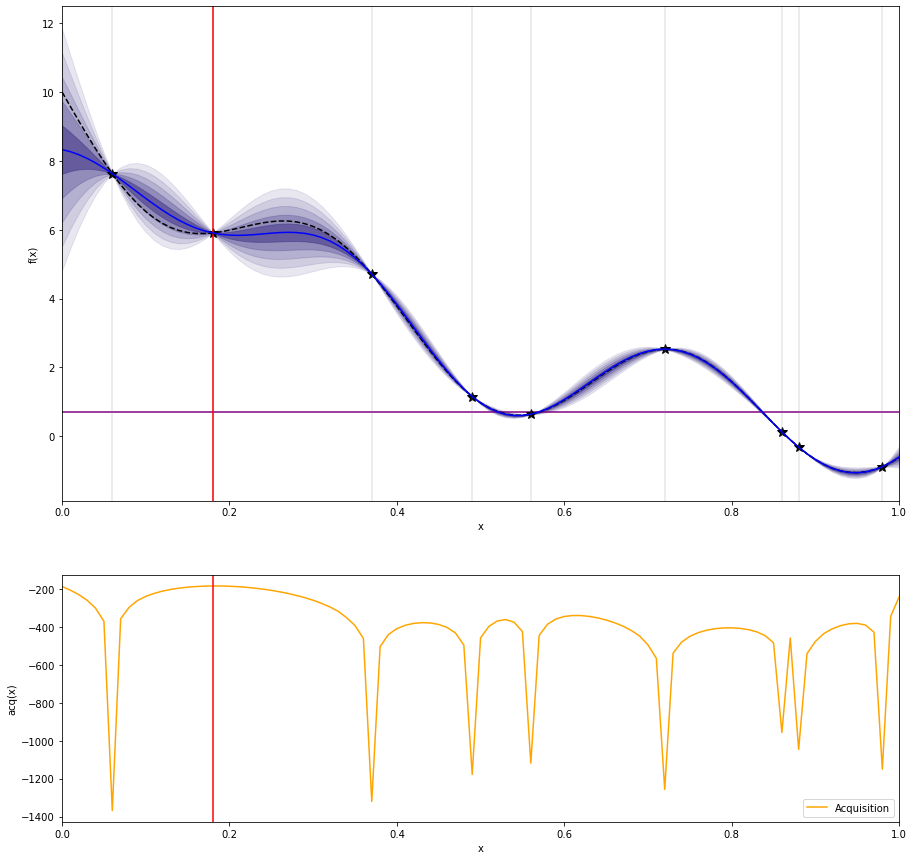

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(


tensor([ -263.0840,  -285.4320,  -312.3313,  -346.2553,  -392.6752,  -468.8623,
        -1368.0562,  -474.3380,  -414.7746,  -385.1195,  -368.8630,  -361.1429,
         -360.1754,  -365.5367,  -377.8100,  -398.9323,  -433.9079,  -499.3725,
        -1342.1918,  -508.6434,  -440.8399,  -403.7274,  -380.0810,  -364.4715,
         -354.4693,  -348.7844,  -346.6717,  -347.6955,  -351.6293,  -358.4164,
         -368.1706,  -381.2159,  -398.1897,  -420.2783,  -449.8159,  -492.1458,
         -564.4205, -1319.3756,  -560.4158,  -496.8882,  -463.0204,  -442.2079,
         -429.5034,  -423.0540,  -422.3944,  -428.1092,  -442.2063,  -469.8689,
         -528.0811, -1177.4331,  -526.2284,  -456.8135,  -424.0327,  -414.6189,
         -429.9741,  -485.6009, -1118.1105,  -474.2492,  -414.1294,  -386.4247,
         -373.1234,  -368.2067,  -368.9293,  -373.9021,  -382.4427,  -394.3160,
         -409.6470,  -428.9536,  -453.3411,  -485.0657,  -529.3467,  -602.9819,
        -1256.7322,  -628.0971,  -565.97

<Figure size 432x288 with 0 Axes>

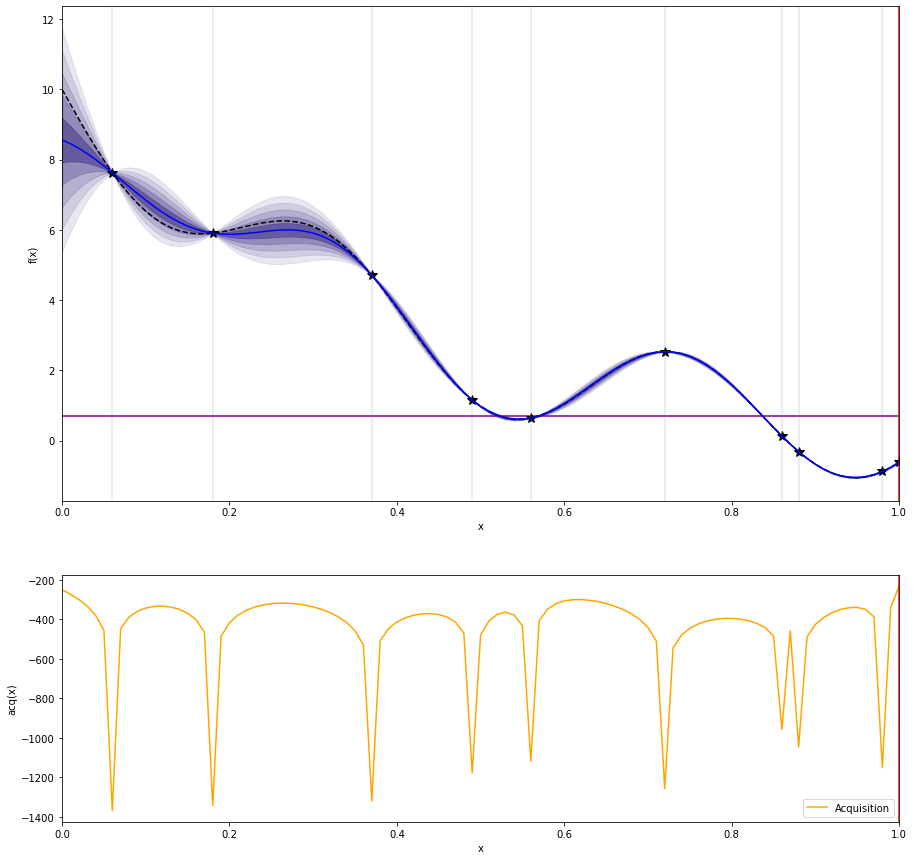

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(


tensor([-1395.3666,  -667.7637,  -624.8564,  -617.8589,  -635.2266,  -688.7656,
        -1368.0562,  -678.4407,  -605.5311,  -565.0773,  -539.9108,  -524.8298,
         -517.8212,  -518.2875,  -526.6724,  -544.8107,  -577.6735,  -642.1066,
        -1342.1918,  -631.2189,  -562.5123,  -524.2884,  -499.4432,  -482.5673,
         -471.2349,  -464.1599,  -460.6038,  -460.1412,  -462.5569,  -467.8066,
         -476.0151,  -487.5157,  -502.9509,  -523.5059,  -551.5005,  -592.2335,
         -662.6937, -1319.3756,  -674.6782,  -609.0257,  -573.7280,  -551.8478,
         -538.3395,  -531.3146,  -530.2996,  -535.8919,  -550.1399,  -578.3289,
         -637.7784, -1177.4331,  -619.3763,  -550.7975,  -518.3692,  -508.8466,
         -523.5466,  -577.8444, -1118.1105,  -579.9851,  -517.8353,  -488.9088,
         -474.8198,  -469.3962,  -469.8027,  -474.5913,  -483.0414,  -494.8943,
         -510.2632,  -529.6656,  -554.2210,  -586.2252,  -630.9981,  -705.6735,
        -1256.7322,  -710.4650,  -648.37

<Figure size 432x288 with 0 Axes>

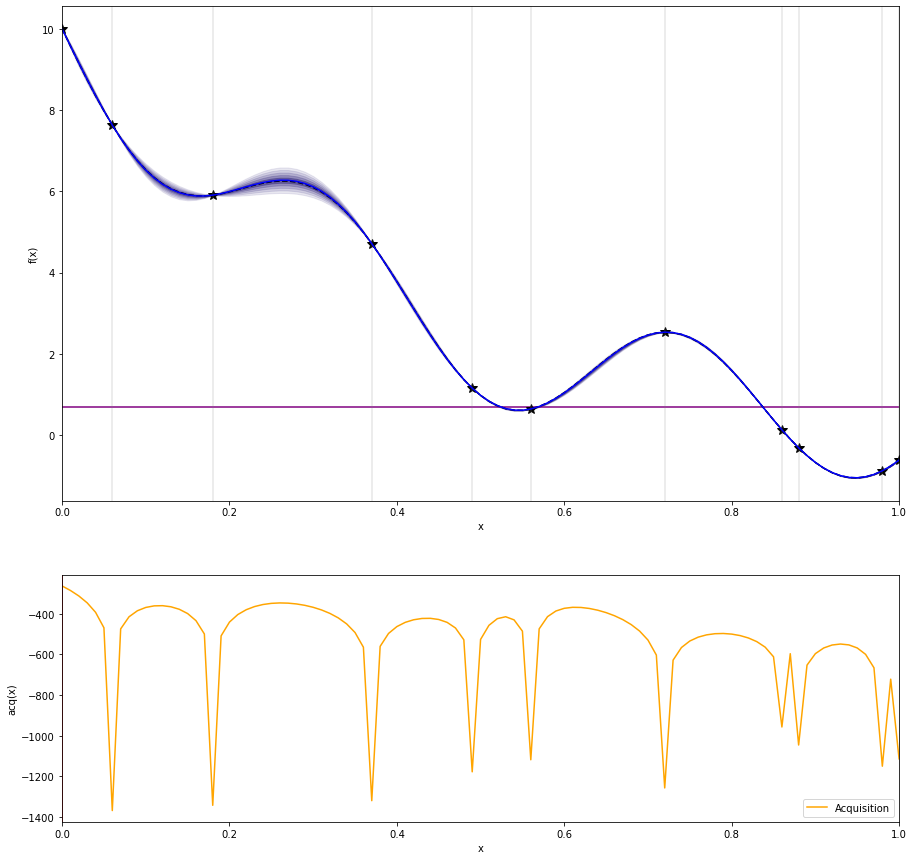

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(


tensor([-1395.3666,  -767.5192,  -729.2792,  -727.1294,  -749.5361,  -808.3176,
        -1368.0562,  -810.4534,  -743.5492,  -709.3787,  -690.8011,  -682.6486,
         -682.9505,  -691.1619,  -707.7928,  -734.7615,  -777.1453,  -851.9271,
        -1342.1918,  -862.6886,  -808.0386,  -785.9355,  -780.0324,  -786.1867,
         -804.3452,  -838.5465,  -905.0422, -1347.9432,  -917.5737,  -853.6301,
         -821.7346,  -805.0628,  -798.8844,  -801.9999,  -815.4731,  -843.8916,
         -903.9210, -1319.3756,  -881.6967,  -808.7253,  -766.4957,  -738.1332,
         -718.5591,  -705.8361,  -699.4399,  -699.9158,  -709.2531,  -732.6520,
         -787.2328, -1177.4331,  -774.8667,  -701.8677,  -665.5618,  -652.5746,
         -664.2361,  -716.0643, -1118.1105,  -699.8114,  -635.6399,  -604.4337,
         -587.9813,  -580.1685,  -578.1866,  -580.6011,  -586.6970,  -596.2167,
         -609.2703,  -626.3682,  -648.6166,  -678.2864,  -720.6428,  -792.6477,
        -1256.7322,  -808.6890,  -744.14

<Figure size 432x288 with 0 Axes>

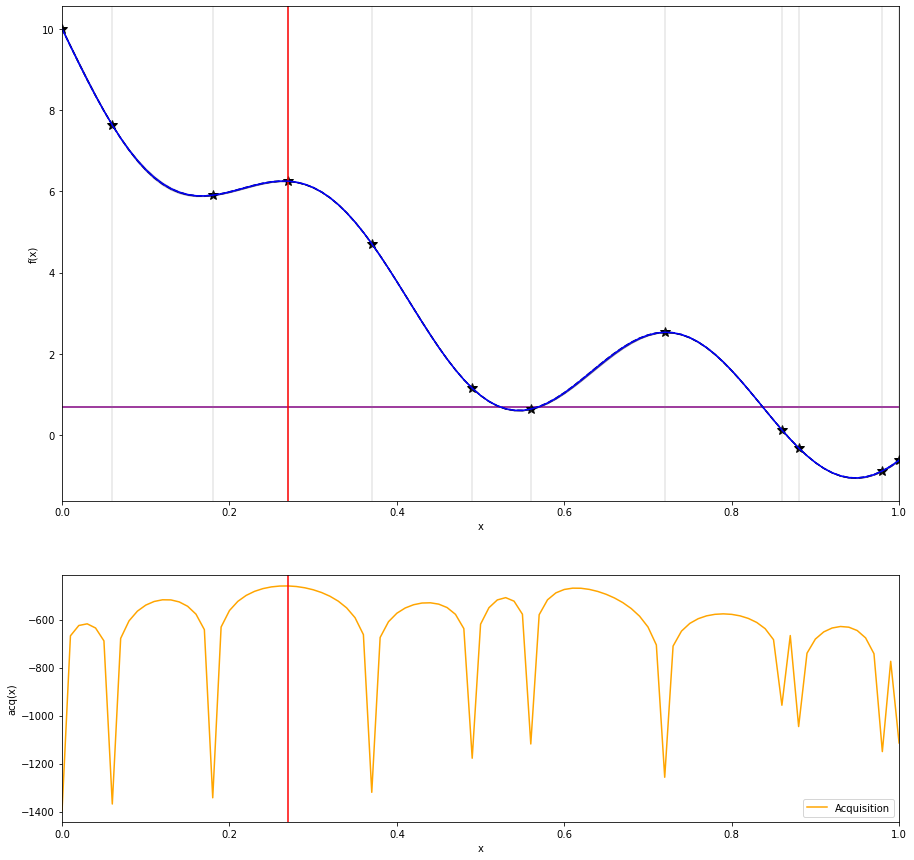

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(


tensor([-1395.3666,  -822.5670,  -785.7056,  -785.3070,  -809.7256,  -870.9014,
        -1368.0562,  -868.6380,  -803.6187,  -771.3661,  -754.7426,  -748.5825,
         -750.9174,  -761.2032,  -779.9511,  -809.0797,  -853.6663,  -930.6946,
        -1342.1918,  -954.7090,  -901.8951,  -882.0026,  -878.5240,  -887.2786,
         -908.2167,  -945.4216, -1015.3119, -1347.9432, -1024.4771,  -963.4990,
         -934.6594,  -921.1401,  -918.2177,  -924.7001,  -941.6593,  -973.6913,
        -1037.4717, -1319.3756, -1032.0215,  -962.5517,  -924.3190,  -900.2969,
         -885.3755,  -877.6206,  -876.5289,  -882.6817,  -898.1248,  -928.1544,
         -990.1155, -1177.4331,  -985.1428,  -920.7690,  -893.9296,  -891.4399,
         -914.8818,  -980.1122, -1118.1105, -1004.7187,  -962.3729,  -959.8219,
         -984.0466, -1046.0330, -1193.7695, -1046.1576,  -982.1300,  -950.6059,
         -934.5385,  -929.0671,  -932.9150,  -947.0992,  -976.1759, -1036.7856,
        -1256.7322, -1024.1903,  -950.63

<Figure size 432x288 with 0 Axes>

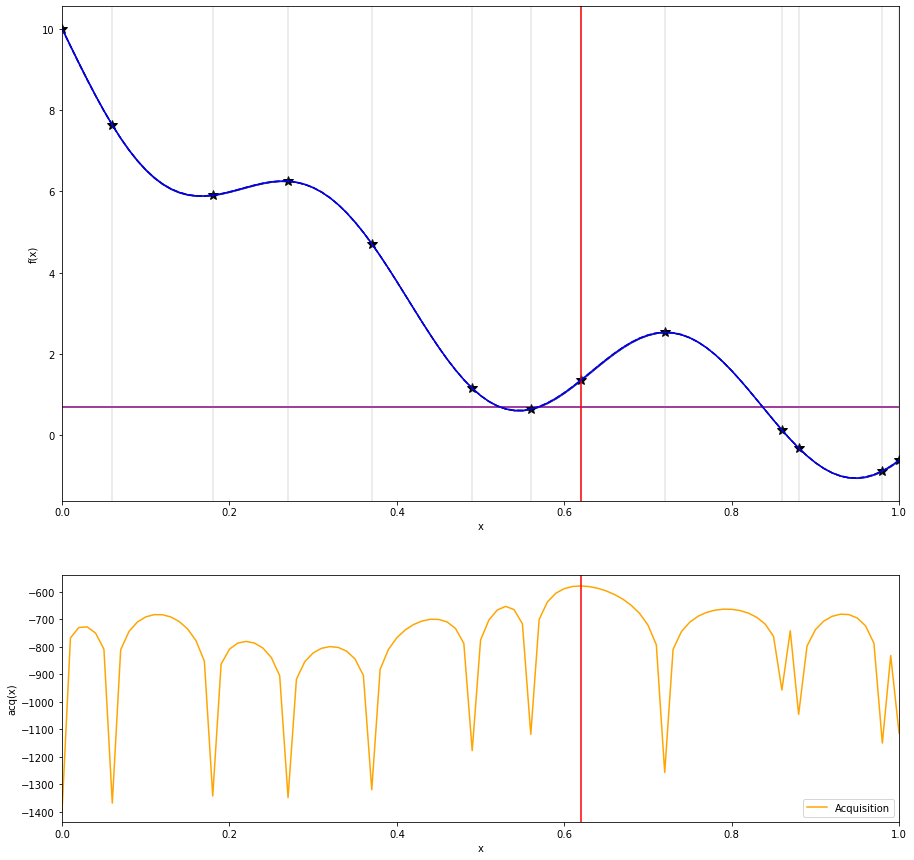

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distributions\multivariate_normal.py:259: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\likelihoods\gaussian_likelihood.py:270: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\gpytorch\distribution

KeyboardInterrupt: 

In [4]:
for problem_details in [problem_one_details, problem_two_details, problem_three_details]:
    # three ttoy examples

    # The abstract inerfaces in base.py of the ExcursionModel and AcquisitionFunction define a method set_params()
    # This allows the builders to control the kwargs of the model and acq function objects.
    base_model = build_model(model_type, rangedef=problem_details.rangedef, **base_model_kwargs)
    acq_func = build_acquisition_func(acq_type, device_opt=device, dtype=dtype)
    # We can see the usefulness of the abstract interface and builder design pattern in creating an optimizer and passing
    # along already created model and acq function objects. The set_params has ensured that the objects
    # passed into the optimizer will be on the same device and using the same data type of the optimizer.
    # If a user creates a custom model and implements the abstract interface, they will always be able to use
    # the optimizer class for solving their excursion problem.
    optimizer = Optimizer(problem_details=problem_details, base_model=base_model, acq_func=acq_func,
                          jump_start=jump_start, device=device_str, n_initial_points=n_initial_points,
                          initial_point_generator='random', fit_optimizer=fit_optimizer, base_model_kwargs={},
                          dtype='torch.float64', log=False)

    for x in range(10+plus_iterations):
        x = optimizer.ask()
        y = problem_details.functions[0](x)
        result = optimizer.tell(x, y)
        plot(result)